## **MOBILE PRICE CLASSIFICATION**



**Dataset as 21 features and 2000 entries. The meanings of the features are given below.**

* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
*  dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Byte
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
* price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



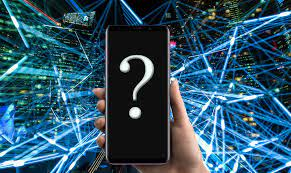

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#import dataset
df=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe()

**Checking for null values**

In [ ]:
df.isnull().sum()

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

**Checking the variance**

In [ ]:
df.var()

In [ ]:
df['price_range'].unique()

# Exploratory Data Analysis

**Relationship between ram and price**

In [ ]:
sns.pointplot(y='ram',x='price_range',data=df)

**Relationship between battery and price**

In [ ]:
sns.pointplot(x='price_range',y='battery_power',data=df)

In [ ]:
sns.boxplot(x='price_range',y='battery_power',data=df)

**Relationship between memory and price**

In [ ]:
sns.pointplot(x='price_range',y='int_memory',data=df)

In [ ]:
col = df.columns
col


In [ ]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

 **Count Plot for all the columns**

In [ ]:
for i in categorical_col:
  sns.countplot(df[i])
  plt.xlabel(i)
  plt.show()

**Histogram**

In [ ]:
 for i in df.drop(df[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

**Checking the correlation by plotting correlation plot.**

In [ ]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

In [ ]:
# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means



In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

In [ ]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

In [ ]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [ ]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

So,VIF is less than 5.So, There is no multicollinearity.

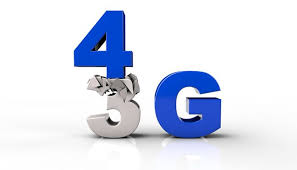

**3G supported phones**

In [ ]:
labels = ["3G-supported",'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

**4G supported phones**

In [ ]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

# Models

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)


**1.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)




y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

**2.KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_test_pred1 = knn.predict(x_test)
y_train_pred1=knn.predict(x_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

**3.SVC**

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_test_pred2 = svc.predict(x_test)
y_train_pred2=svc.predict(x_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))


**4.DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_pred3 = dtc.predict(x_test)
y_train_pred3=dtc.predict(x_train)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

In [ ]:
# hyper parameter tuning

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

In [ ]:

grid_search.best_params_

In [ ]:
dtc = grid_search.best_estimator_

In [ ]:
y_predi=dtc.predict(x_test)

In [ ]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_predi)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

**5.AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_


In [ ]:
grid_search.best_score_

In [ ]:
ad = grid_search.best_estimator_
ad.fit(x_train,y_train)

In [ ]:
y_pred = ad.predict(x_test)

In [ ]:
ada_train_acc = accuracy_score(y_train, ad.predict(x_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {ada_train_acc}")
print(f"Test Accuracy of Random Forest Model is {ada_test_acc}")

**6.GradientBoostingClassifier**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_test_pred6 = gbc.predict(x_test)
y_train_pred6=gbc.predict(x_train)

gbc_acc=accuracy_score(y_test_pred6,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

**7.XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(x_train, y_train)

y_test_pred7 = xgb.predict(x_test)
y_train_pred7=xgb.predict(x_train)

xgb_acc= accuracy_score(y_test_pred7,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred7,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred7,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred7,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred7,y_test))

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC',  'Decision Tree Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier',  'XgBoost'],
    'Score': [lr_acc, knn_acc, svc_acc, dtc_test_acc, ada_test_acc, gbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

**SVC Classifier got the highest accuracy.**



# If you liked the notebook,please UPVOTE it.